## 1.Packages

### 1.1.Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


### 1.2.Import

In [1]:
import numpy as np # for scientific computing
import pandas as pd # a fundamental and powerful package for data analysis and manipulation
import seaborn as sns # seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import pyreadstat # for reading .sav file
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split # for separating train and test data, scaling, model building, ...
from scipy import stats # it contains a large number of statistics, probability distributions functions
import matplotlib.pyplot as plt # matplotlib is a library to plot graphs in Python

## 2.Data

### 2.1.Load Data

In [2]:
# reading data as a data frame, setting ID as the index and getting the number of rows and columns
df = pd.DataFrame(pd.read_spss("../data/secom_mod.sav"))
df = df.set_index('ID')
df.shape 

(1567, 592)

In [3]:
# have a look at the first five rows of dataset
df.head()

,class,timestamp,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
ID,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
2.0,0.0,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
3.0,1.0,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
4.0,0.0,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
5.0,0.0,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


### 2.2.Change "class" feature Type and Values

In [4]:
# types of data in the dataset
df.dtypes

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

In [5]:
# change 0 to pass and 1 to fail in the target variable
dict_temp = {0:'pass' ,1:'fail'}
df['class'] = df['class'].map(dict_temp)

In [6]:
# number of pass and fail values
df['class'].value_counts()

pass    1472
fail      95
Name: class, dtype: int64

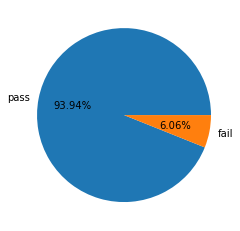

In [7]:
# pie chart of the target variable
fig = plt.pie(df['class'].value_counts(),labels=['pass','fail'], autopct="%.2f%%")

In [8]:
# a summary of statistics pertaining to the DataFrame columns
df.describe()

,feature001,feature002,feature003,feature004,feature005,feature006,feature007,feature008,feature009,feature010,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


### 2.3.Drop timestamp

In [9]:
# removing the "timestamp" feature
df = df.drop(columns='timestamp')

### 2.4.Splitting Traninig and Test Data 

In [10]:
# defining the target variable to get the same proportion defaults in both train and test dataset
y = df['class']
x = df.drop('class', axis=1)

In [11]:
# spliting the dataset with the proportion of 20% for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state=40, shuffle=True, stratify=y)

## 3.Feature Removal

### 3.1.Constant

In [12]:
# getting the number of rows of the x_train
x_train.shape

(1253, 590)

In [13]:
# number of features with only one value and and missing value (100% constant, 0 variance)
len(x_train[x_train.columns[x_train.nunique() == 1]].columns)

116

In [14]:
# dropping the constant features from the x_train
x_train.drop(list(x_train[x_train.columns[x_train.nunique() == 1]].columns), axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
# getting the number of rows of the x_train
x_train.shape

(1253, 474)

### 3.2.With more than 55% Na

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

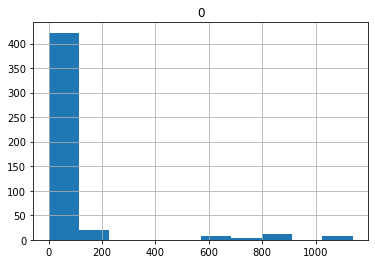

In [16]:
# counting number of missing values in each features
feature_na_sum = pd.DataFrame((x_train.isna()).sum())
# histogram of number of missing values in features
feature_na_sum.hist()

In [17]:
# selecting features containing more than a percentage of missing values
percentage_missing_remove = 55/100
feature_na_r = feature_na_sum[feature_na_sum[0]>=(len(x_train.loc[:,])*percentage_missing_remove)].index
# number of features containing more than 55% missing values
len(feature_na_r)

24

In [18]:
# dropping the features containing more than a percentage of missing values from the x_train
x_train.drop(feature_na_r, axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\envs\BP1\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 3.3.least volatile

In [19]:
# calculationg the standard deviation and the coefficient standard deviation of each features
summary = x_train.describe(include='all')
feature_std = pd.DataFrame(summary.loc['std',:])
feature_coeffstd = pd.DataFrame(summary.loc['std',:]/abs(summary.loc['mean',:]))

In [20]:
# the min and max of the standard deviation of features
print(min(feature_std.iloc[:,0]))
print(max(feature_std.iloc[:,0]))

0.0001055328779148529
6438.937158652618


In [21]:
# the min and max of the coefficient standard deviation of features
print(min(feature_coeffstd.iloc[:,0]))
print(max(feature_coeffstd.iloc[:,0]))

0.0023114813081706598
709.586291505058


In [22]:
# sorting features based on the coefficient standard deviation
feature_coeffstd_sort = feature_coeffstd.sort_values(by=[0])

<AxesSubplot:>

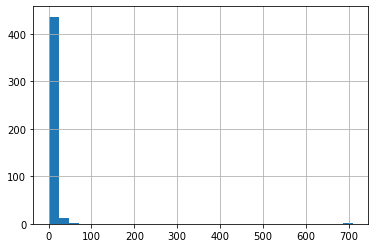

In [23]:
# histogram of the coefficient standard deviation of features
feature_coeffstd_sort.iloc[:,0].hist(bins=30)

<AxesSubplot:>

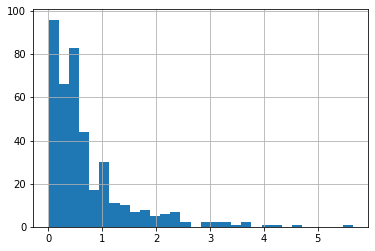

In [24]:
# histogram of the coefficient standard deviation of a percentage of features with the least coeffstd
percentage_features = int(len(feature_coeffstd_sort)*90/100)
feature_coeffstd_sort.iloc[0:percentage_features,0].hist(bins=30)

In [25]:
# a percentage of features with the least coeffstd to remove
percentage_features_rm = int(len(feature_coeffstd_sort)*5/100)
feature_index = feature_coeffstd_sort.index
feature_least_volatiles = feature_index[0:percentage_features_rm+1]
len(feature_least_volatiles)

23

In [26]:
# dropping a percentage of features with the least coeffstd
x_train.drop(feature_least_volatiles, axis = 1, inplace = True)

## 4.Outlier Identification

In [27]:
# calculating the z score of the values
z_x_train= pd.DataFrame(stats.zscore(x_train,nan_policy='omit'))

In [28]:
# calculating the number of outliers
sum(z_x_train.apply(lambda x: sum(x.apply(lambda x: 1 if abs(x)>3 else 0))))

4724